In [1]:
%load_ext autoreload  
%autoreload 2  

In [2]:
from ocpy.data import Data
# data okuma check

data = Data.from_file("ny_vir.xlsx")
data = data.calculate_weights()

q =  0.0
a =  0.0
b =  0.0
amp =  0.0002
e =  0.0
omega =  0.0
P =  80000.0
T0 =  60000.0
amp =  5e-05
e =  0.0
omega =  0.0
P =  40000.0
T0 =  30000.0


(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

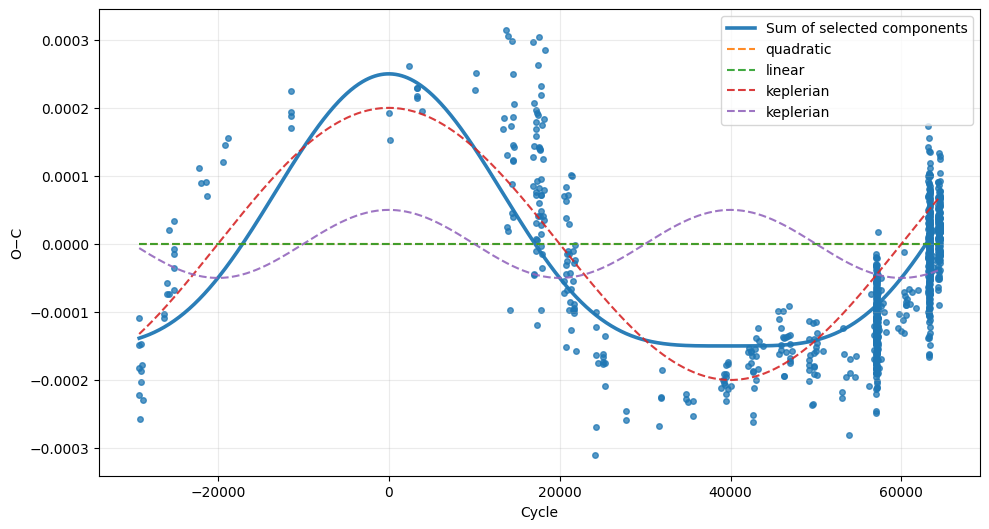

In [3]:
from ocpy.oc import Linear, Quadratic, Keplerian, Parameter

oc = data.calculate_oc(reference_minimum=2453174.442769,
                       reference_period=0.101015969,
                       model_type="pymc")
oc = oc[oc["labels"] != "vis"]

# 1) Linear (y = a*x + b)
lin = Linear(
    a=Parameter(value=0.0,   std=2e-5,  min=-1e-3,  max=1e-3,  fixed=False),
    b=Parameter(value=0.0,   std=2e-3,  min=-0.1,   max=0.1,   fixed=False),
)

# 2) Quadratic (q * x^2)
quad = Quadratic(
    q=Parameter(value=0.0,   std=5e-10, min=-1e-8,  max=1e-8,  fixed=False),
)

# 3) Keplerian #1 (yaklaşık 80k epoch)
lite1 = Keplerian(
    P     = Parameter(value=80000,  std=8_000,  min=30_000,  max=150_000, fixed=False),
    T0    = Parameter(value=60000,  std=5_000,                          fixed=False),
    amp   = Parameter(value=2.0e-4, std=1.0e-4, min=0.0,    max=1.0e-3,  fixed=False),
    e     = Parameter(value=0.0,    fixed=True),
    omega = Parameter(value=0.0,    fixed=True),
)

# 4) Keplerian #2 (yaklaşık 40k epoch)
lite2 = Keplerian(
    P     = Parameter(value=40000,  std=6_000,  min=10_000,  max=100_000, fixed=False),
    T0    = Parameter(value=30000,  std=5_000,                          fixed=False),
    amp   = Parameter(value=5.0e-5, std=2.5e-5, min=0.0,    max=5.0e-4,  fixed=False),
    e     = Parameter(value=0.0,    fixed=True),
    omega = Parameter(value=0.0,    fixed=True),
)

oc.plot_components_on_data([quad, lin, lite1, lite2])


In [4]:
res = oc.fit([lin, quad, lite1, lite2],
             progressbar=True, draws=1000, tune=1000, chains=4,
             target_accept=0.9)

a =  linear1_a
b =  linear1_b
q =  quadratic2_q
amp =  keplerian3_amp
e =  keplerian3_e
omega =  keplerian3_omega
P =  keplerian3_P
T0 =  keplerian3_T0
amp =  keplerian4_amp
e =  keplerian4_e
omega =  keplerian4_omega
P =  keplerian4_P
T0 =  keplerian4_T0


Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [linear1_a, linear1_b, quadratic2_q, keplerian3_amp, keplerian3_P, keplerian3_T0, keplerian4_amp, keplerian4_P, keplerian4_T0]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 224 seconds.


c:\Users\bar1s\miniconda3\envs\ocpy\Lib\site-packages\arviz\plots\pairplot.py:229: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(
c:\Users\bar1s\miniconda3\envs\ocpy\Lib\site-packages\arviz\plots\backends\matplotlib\pairplot.py:223: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


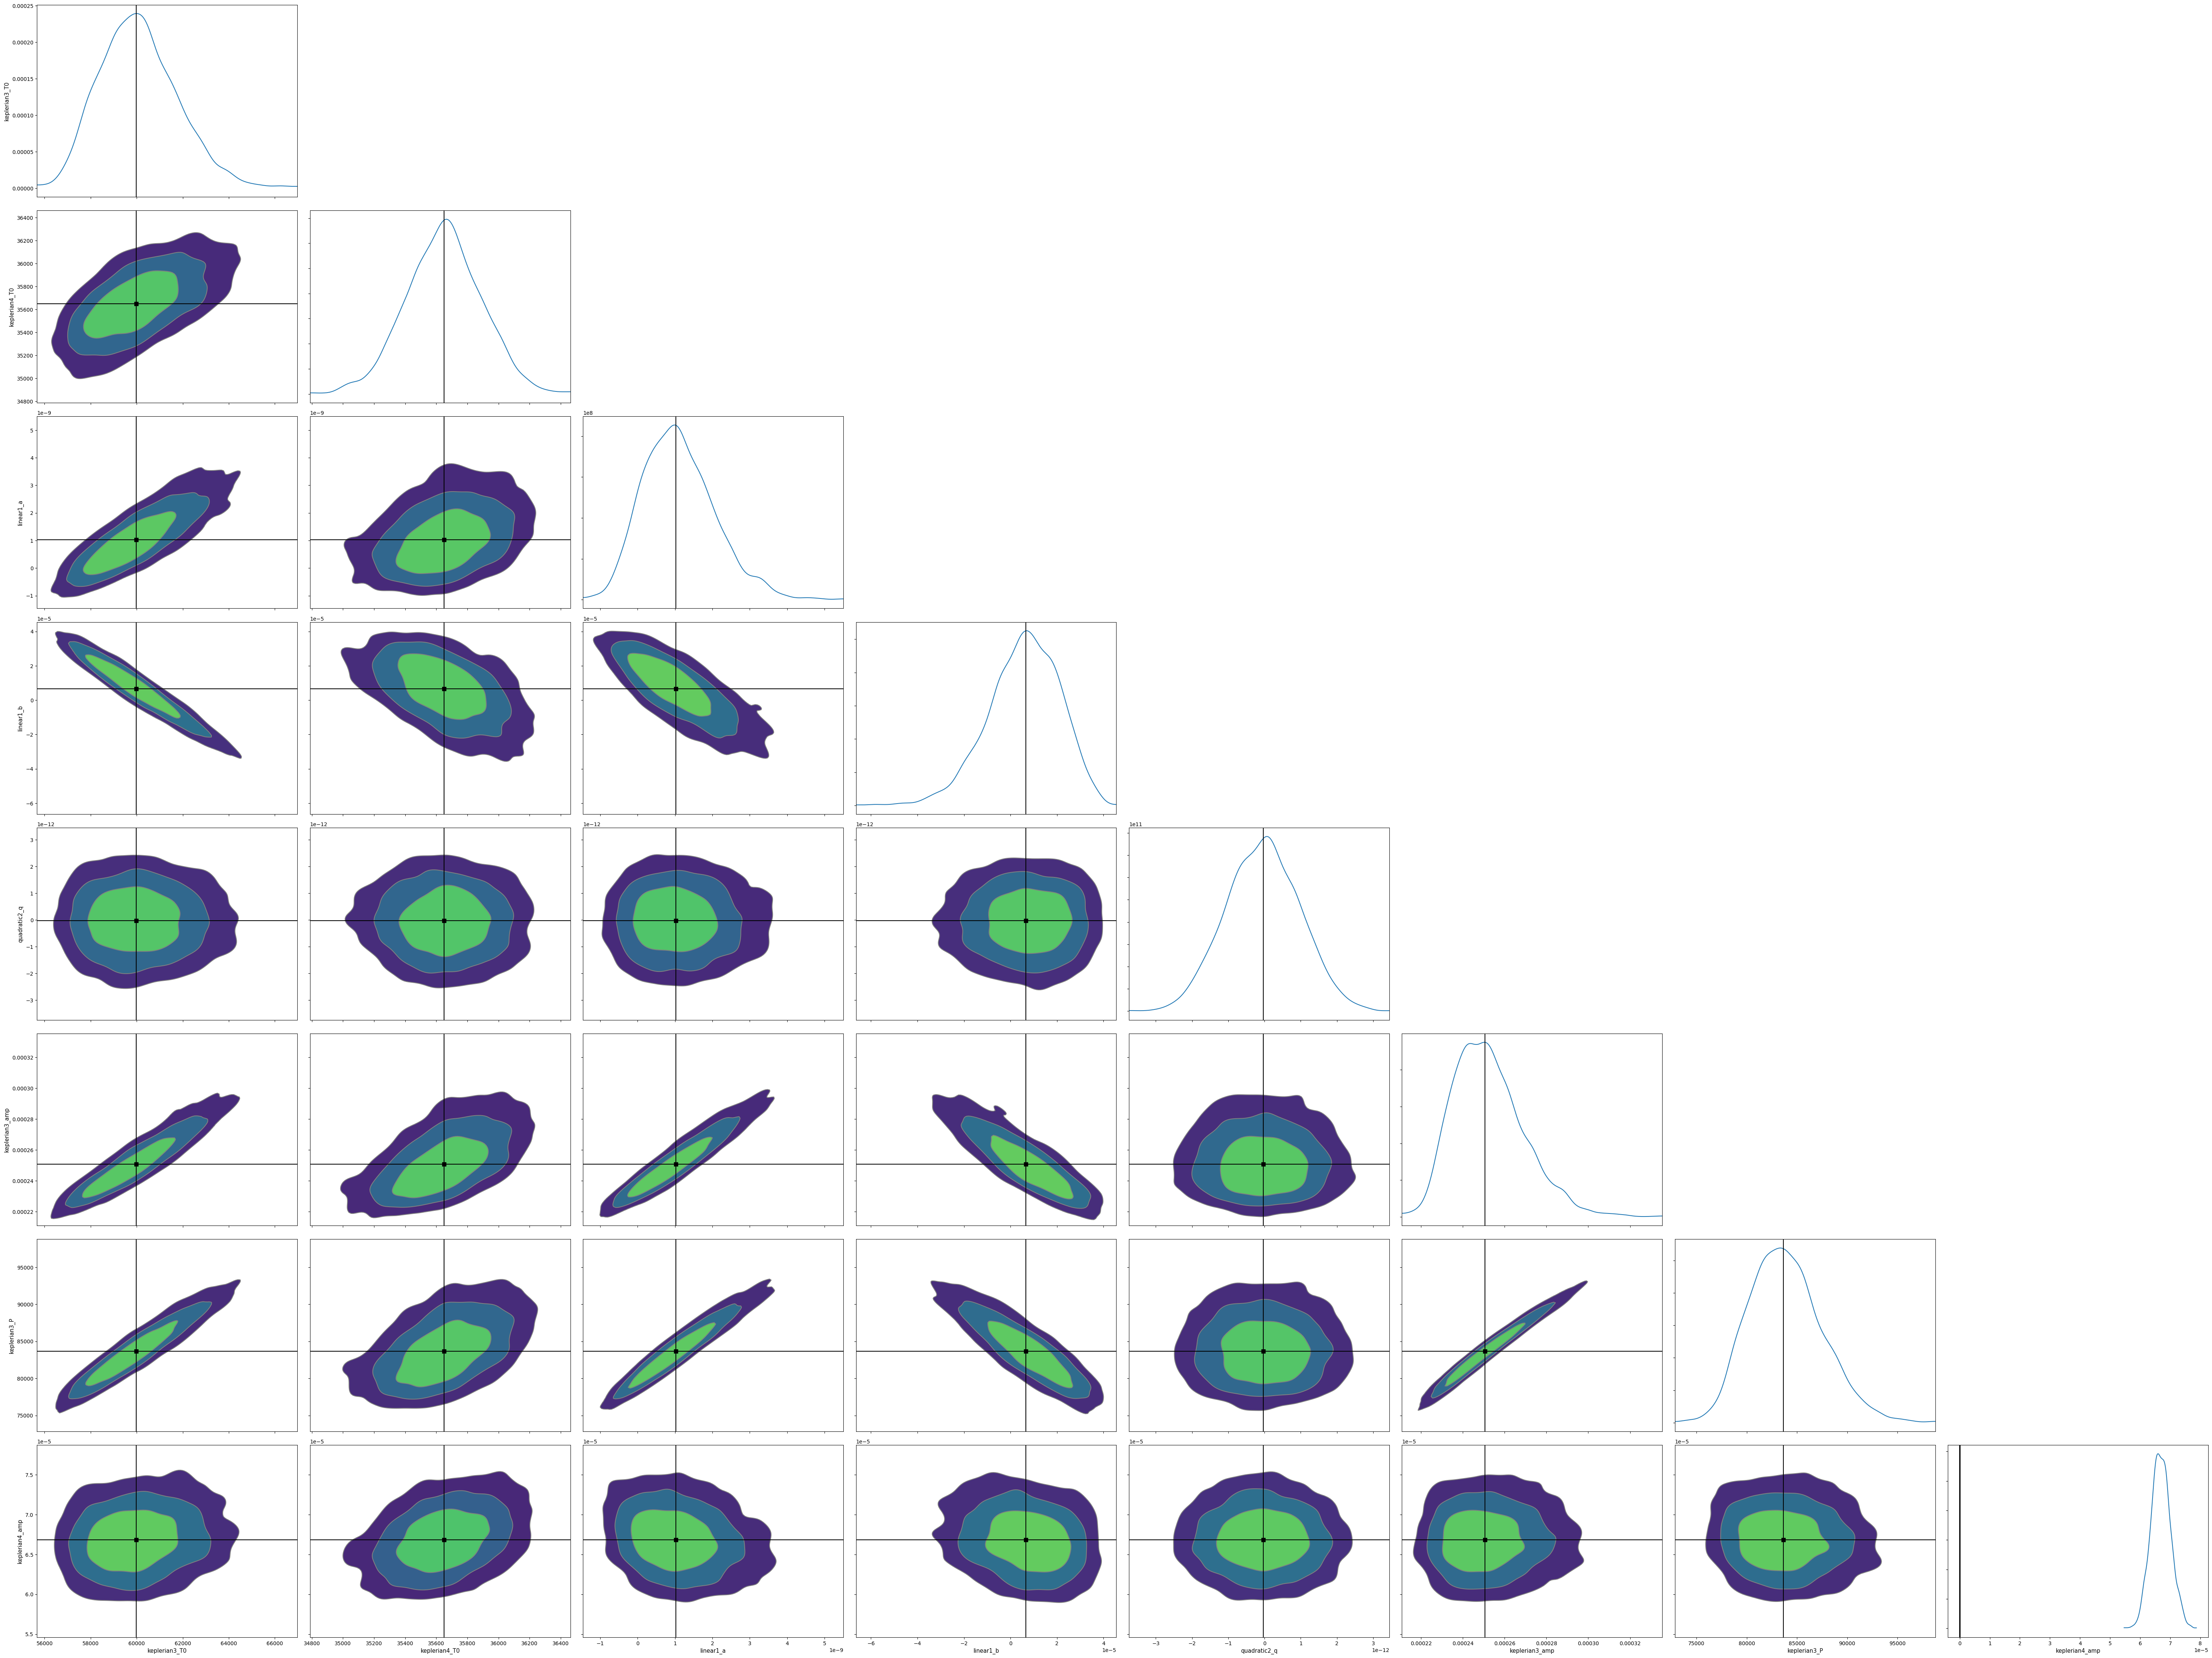

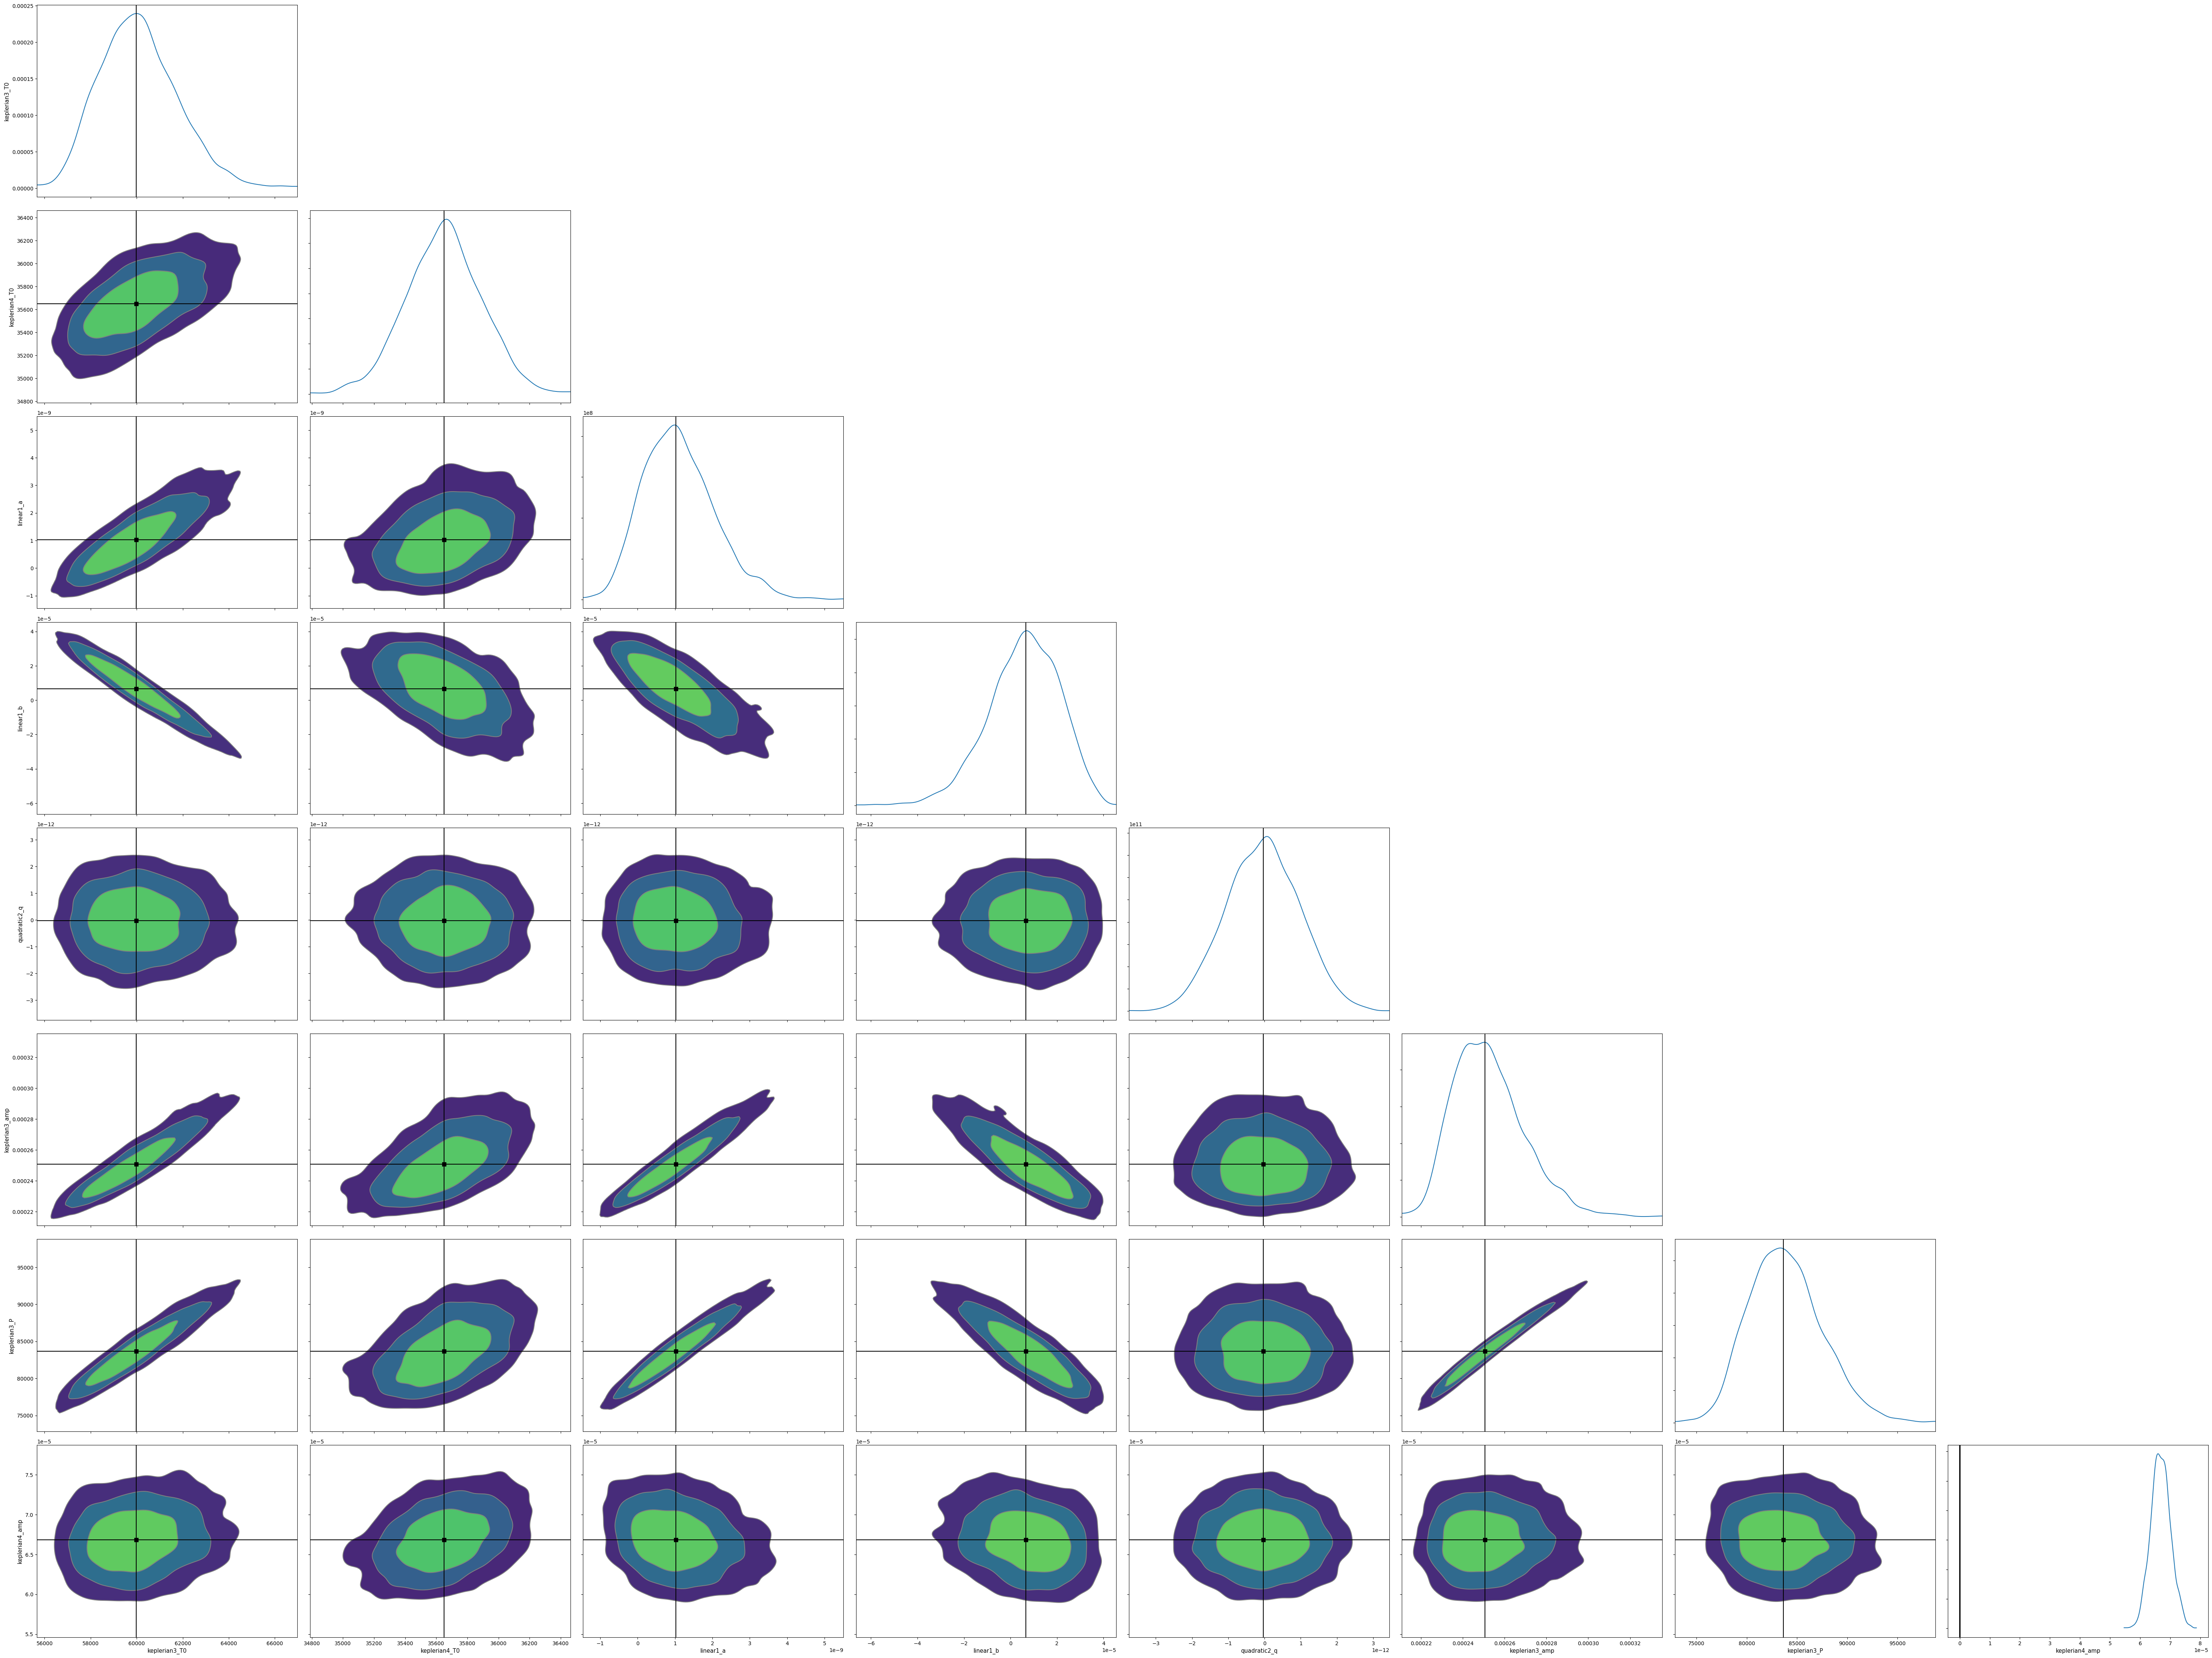

In [5]:
oc.create_corner_plot(res)

In [10]:
res

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

amp =  0.0002506426295863887
e =  0.0
omega =  0.0
P =  83653.23207927402
T0 =  59980.80481414817
amp =  6.681060024150638e-05
e =  0.0
omega =  0.0
P =  31186.540743404767
T0 =  35649.98500176327
a =  1.026816009525467e-09
b =  6.62056344023082e-06
q =  -2.4857547837107973e-14


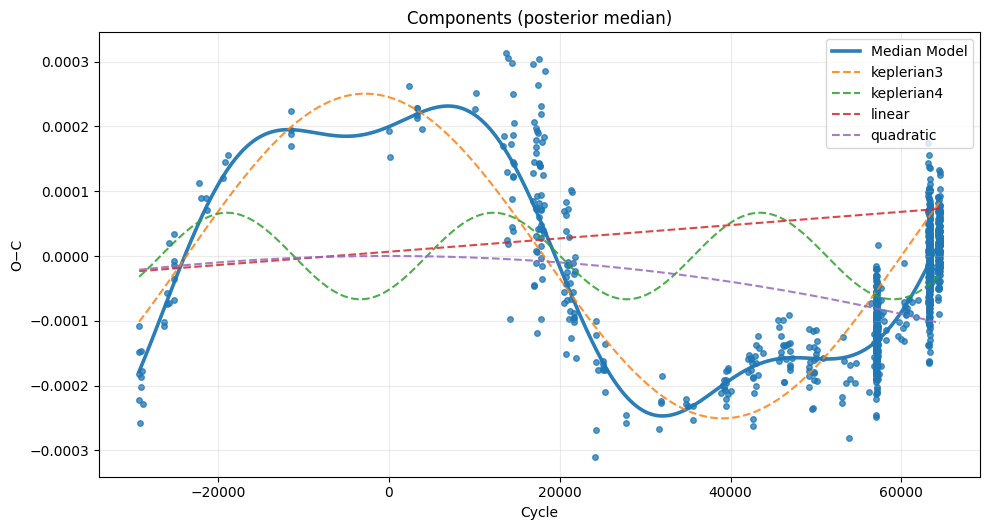

In [7]:
oc.fit_and_report(res)

In [11]:
res

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

q =  -2.464e-14
a =  1.005e-09
b =  7.428e-06
amp =  0.00025
e =  0.0
omega =  0.0
P =  83520.0
T0 =  59890.0
amp =  6.681e-05
e =  0.0
omega =  0.0
P =  31170.0
T0 =  35640.0


(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

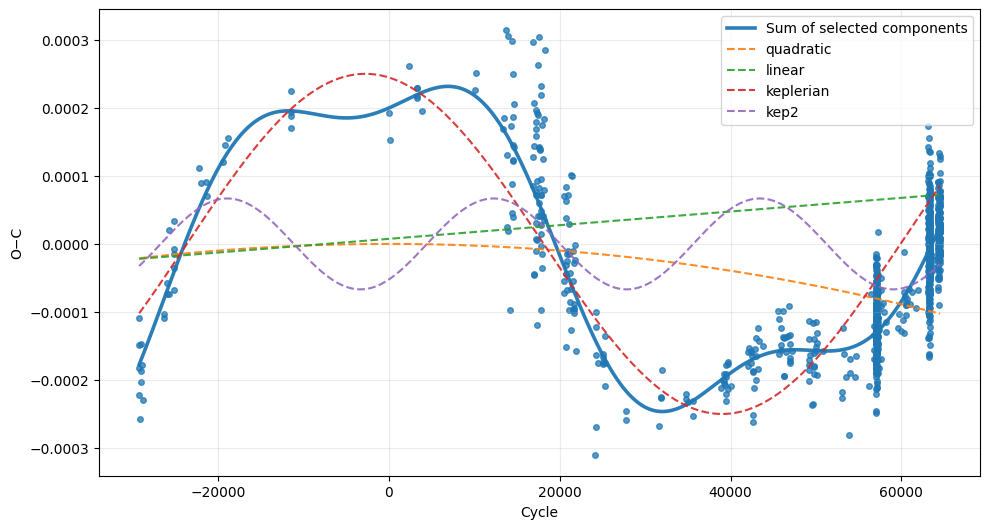

In [9]:
lin = Linear(
    a=Parameter(value=1.005e-09, fixed=False),
    b=Parameter(value=7.428e-06, fixed=False),
)

quad = Quadratic(
    q=Parameter(value=-2.464e-14, fixed=False),
)

lite1 = Keplerian(
    P=Parameter(value=8.352e+04, fixed=False),
    T0=Parameter(value=5.989e+04, fixed=False),
    amp=Parameter(value=0.00025, fixed=False),
    e=Parameter(value=0.0, fixed=True),
    omega=Parameter(value=0.0, fixed=True),
)

lite2 = Keplerian(
    name="kep2",
    P=Parameter(value=3.117e+04, fixed=False),
    T0=Parameter(value=3.564e+04, fixed=False),
    amp=Parameter(value=6.681e-05, fixed=False),
    e=Parameter(value=0.0, fixed=True),
    omega=Parameter(value=0.0, fixed=True),
)

oc.plot_components_on_data([quad, lin, lite1, lite2])